In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import pandas as pd 
import numpy as np 
import seaborn as sns
import random 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing

tfk = tf.keras
tfkl = tf.keras.layers

Num GPUs Available:  1


In [2]:
BATCH_SIZE = 32
SHAPE = (4096, 23)
BLOCK_SHAPE = (128, 23)
EPOCHS = 30
VARIABLES = 23
NFOLD = 5 
STEPS_PER_EPOCH = 200
ID = 28

In [3]:
if ID == 28:
    file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C28.csv'
elif ID == 37:
    file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C37.csv'
else:
    print('Invalid ID')
df_test = pd.read_csv(file, nrows=100)
float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
float32_cols = {c: np.float16 for c in float_cols}

df = pd.read_csv(file, dtype=float32_cols, engine='c')
df['id'] = df.id.astype('int32')
df = df.dropna()

In [4]:
sources = df[['id', 'plane_id', 'split', 'date_diff', 'before_after']].drop_duplicates()
sources.loc[: , ['split', 'before_after', 'id']].groupby(['split', 'before_after']).count()

id
split before_after     
0     0             589
      1             484
1     0             555
      1             449
2     0             641
      1             552
3     0             343
      1             282
4     0             456
      1             382

In [5]:
df_visual= df.head(100000).drop(['id','plane_id','split','date_diff','before_after'],axis=1)

<AxesSubplot:>

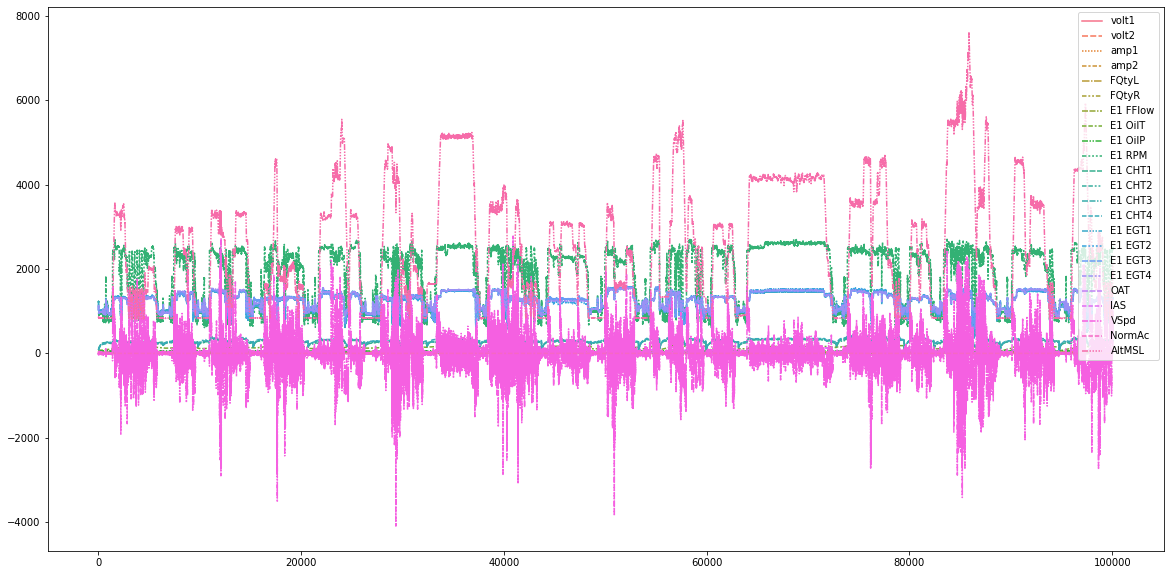

In [6]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_visual)

In [7]:
input_columns = ['volt1',
 'volt2',
 'amp1',
 'amp2',
 'FQtyL',
 'FQtyR',
 'E1 FFlow',
 'E1 OilT',
 'E1 OilP',
 'E1 RPM',
 'E1 CHT1',
 'E1 CHT2',
 'E1 CHT3',
 'E1 CHT4',
 'E1 EGT1',
 'E1 EGT2',
 'E1 EGT3',
 'E1 EGT4',
 'OAT',
 'IAS',
 'VSpd',
 'NormAc',
 'AltMSL']

array([[<AxesSubplot:title={'center':'volt1'}>,
        <AxesSubplot:title={'center':'volt2'}>,
        <AxesSubplot:title={'center':'amp1'}>,
        <AxesSubplot:title={'center':'amp2'}>,
        <AxesSubplot:title={'center':'FQtyL'}>],
       [<AxesSubplot:title={'center':'FQtyR'}>,
        <AxesSubplot:title={'center':'E1 FFlow'}>,
        <AxesSubplot:title={'center':'E1 OilT'}>,
        <AxesSubplot:title={'center':'E1 OilP'}>,
        <AxesSubplot:title={'center':'E1 RPM'}>],
       [<AxesSubplot:title={'center':'E1 CHT1'}>,
        <AxesSubplot:title={'center':'E1 CHT2'}>,
        <AxesSubplot:title={'center':'E1 CHT3'}>,
        <AxesSubplot:title={'center':'E1 CHT4'}>,
        <AxesSubplot:title={'center':'E1 EGT1'}>],
       [<AxesSubplot:title={'center':'E1 EGT2'}>,
        <AxesSubplot:title={'center':'E1 EGT3'}>,
        <AxesSubplot:title={'center':'E1 EGT4'}>,
        <AxesSubplot:title={'center':'OAT'}>,
        <AxesSubplot:title={'center':'IAS'}>],
       [<AxesSubpl

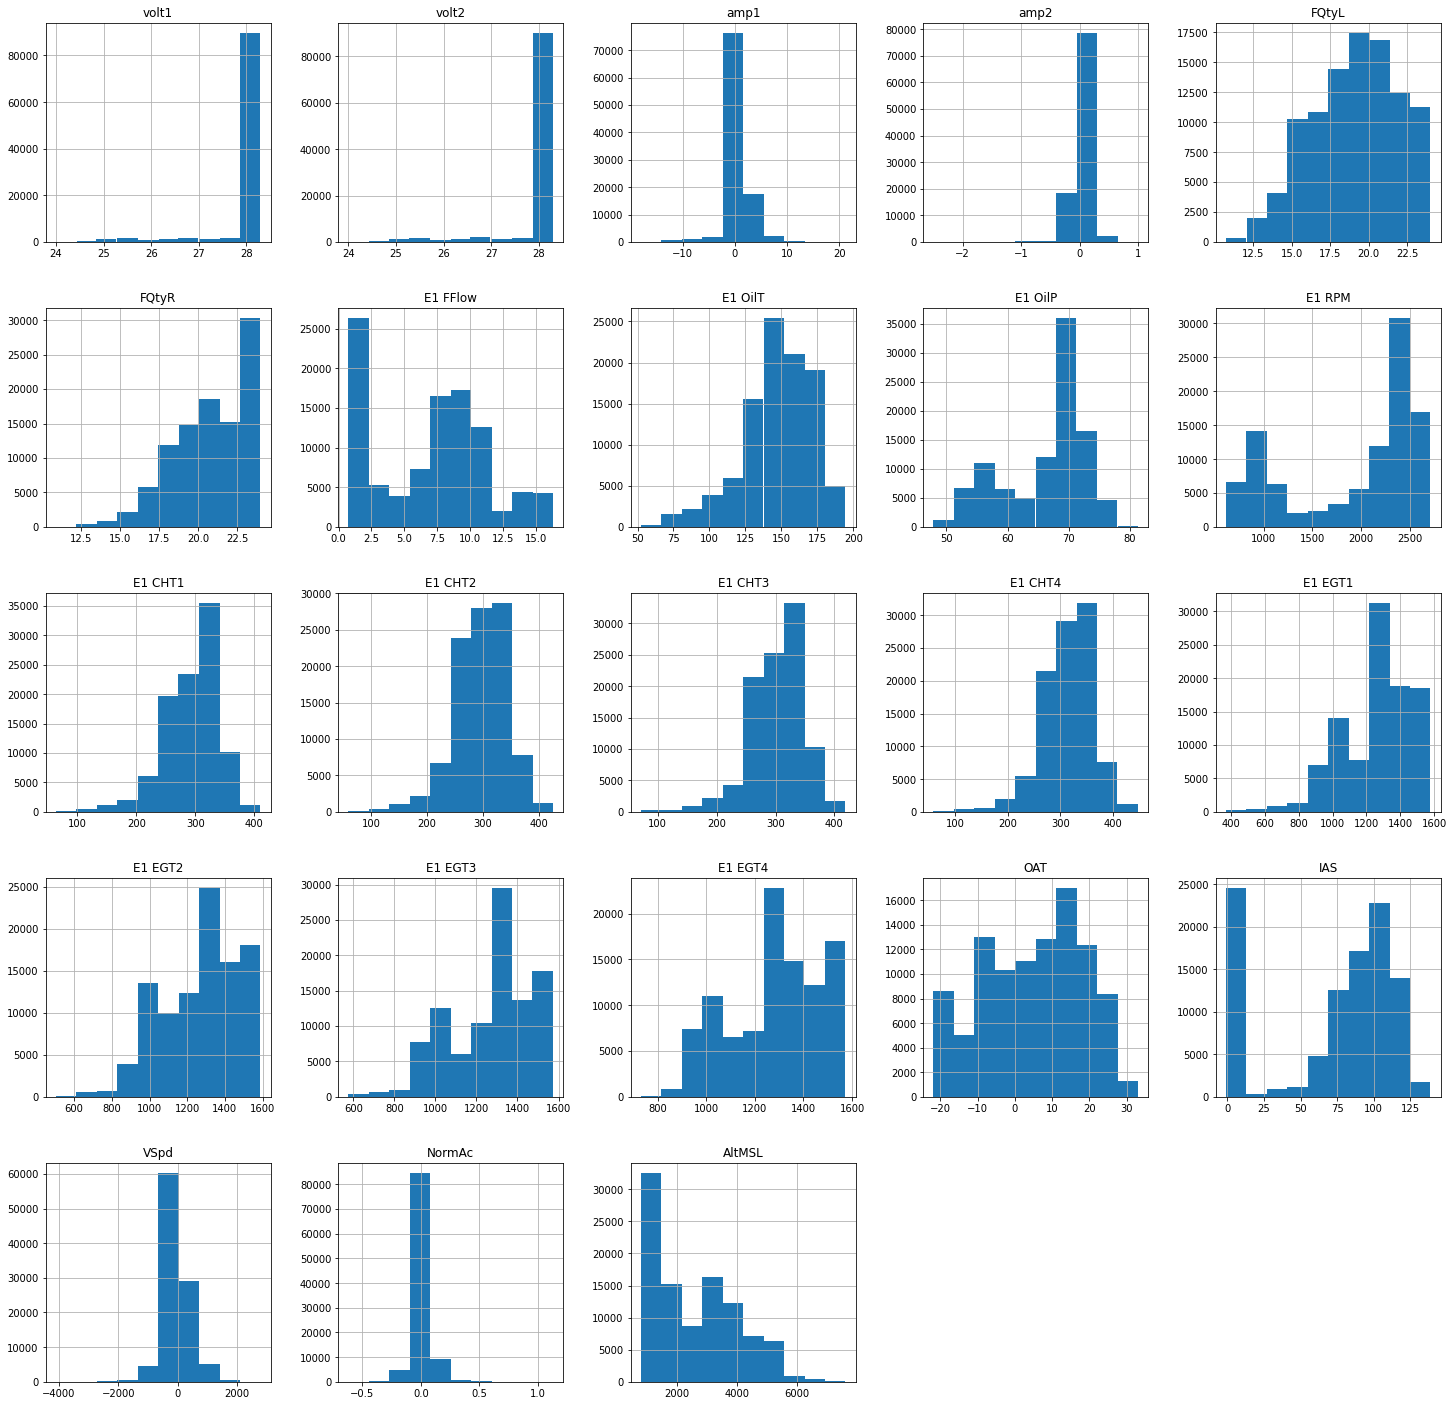

In [8]:
df_visual.hist(figsize = (25,25),column=input_columns)

In [9]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100076
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   volt1     100000 non-null  float16
 1   volt2     100000 non-null  float16
 2   amp1      100000 non-null  float16
 3   amp2      100000 non-null  float16
 4   FQtyL     100000 non-null  float16
 5   FQtyR     100000 non-null  float16
 6   E1 FFlow  100000 non-null  float16
 7   E1 OilT   100000 non-null  float16
 8   E1 OilP   100000 non-null  float16
 9   E1 RPM    100000 non-null  float16
 10  E1 CHT1   100000 non-null  float16
 11  E1 CHT2   100000 non-null  float16
 12  E1 CHT3   100000 non-null  float16
 13  E1 CHT4   100000 non-null  float16
 14  E1 EGT1   100000 non-null  float16
 15  E1 EGT2   100000 non-null  float16
 16  E1 EGT3   100000 non-null  float16
 17  E1 EGT4   100000 non-null  float16
 18  OAT       100000 non-null  float16
 19  IAS       100000 non-null  float16
 20  VSpd

In [10]:
df_visual.head(10)

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
0,28.09375,28.09375,6.398438,0.399902,20.218750,23.84375,2.539062,74.2500,67.5000,1229.0,...,81.9375,1108.0,1006.0,1022.0,1035.0,-2.199219,0.0,13.210938,-0.029999,838.0
1,28.09375,28.09375,6.398438,0.399902,20.218750,23.84375,2.539062,74.2500,67.5000,1229.0,...,81.9375,1108.0,1006.0,1022.0,1035.0,-2.199219,0.0,13.210938,-0.029999,838.0
2,28.09375,28.09375,6.398438,0.500000,20.265625,23.84375,2.470703,74.2500,67.4375,1226.0,...,82.5000,1116.0,1011.0,1028.0,1044.0,-2.199219,0.0,11.148438,-0.029999,839.0
4,28.09375,28.09375,6.199219,0.399902,20.218750,23.84375,2.380859,74.2500,67.5000,1230.0,...,83.7500,1137.0,1022.5,1044.0,1060.0,-2.500000,0.0,-22.515625,-0.020004,841.0
5,28.09375,28.09375,6.300781,0.399902,20.156250,23.81250,2.300781,74.3125,67.5000,1227.0,...,84.3125,1147.0,1029.0,1053.0,1069.0,-2.500000,0.0,-13.546875,-0.010002,841.5
6,28.09375,28.09375,6.199219,0.399902,20.218750,23.81250,2.279297,74.3125,67.3750,1224.0,...,84.8750,1160.0,1037.0,1062.0,1081.0,-2.500000,0.0,1.690430,-0.010002,842.0
7,28.09375,28.09375,6.199219,0.399902,20.156250,23.81250,2.119141,74.3125,67.2500,1218.0,...,85.6250,1174.0,1045.0,1071.0,1095.0,-2.800781,0.0,10.656250,0.010002,861.0
8,28.09375,28.09375,6.101562,0.399902,20.156250,23.78125,2.160156,74.3125,67.1875,1214.0,...,86.2500,1190.0,1055.0,1083.0,1113.0,-2.800781,0.0,0.830078,-0.010002,863.0
9,28.09375,28.09375,6.101562,0.399902,20.218750,23.78125,2.179688,74.3125,67.0625,1206.0,...,86.8125,1204.0,1066.0,1095.0,1130.0,-2.800781,0.0,-8.281250,-0.010002,862.0
10,28.09375,28.09375,6.000000,0.399902,20.218750,23.78125,2.220703,74.3125,67.0625,1207.0,...,87.5625,1218.0,1076.0,1106.0,1144.0,-3.000000,0.0,12.976562,0.010002,862.0


In [11]:
df_visual.describe()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.0000,100000.0,...,100000.00000,100000.00,100000.00,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000
mean,NaN,NaN,NaN,-0.005852,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005856,NaN
std,0.000000,0.000000,0.000000,0.119568,0.000000,0.000000,0.000000,0.00000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.075134,NaN
min,24.000000,24.000000,-18.000000,-2.500000,10.742188,10.867188,0.750000,52.40625,47.8750,611.0,...,58.15625,367.75,503.25,576.0,729.5,-21.796875,-1.070312,-4094.000000,-0.620117,803.500
25%,28.000000,28.000000,0.300049,0.000000,17.093750,19.062500,2.140625,134.75000,60.9375,1140.0,...,286.25000,1108.00,1110.00,1108.0,1134.0,-6.000000,29.183594,-132.750000,-0.020004,984.875
50%,28.093750,28.093750,0.700195,0.000000,19.296875,21.015625,7.820312,149.12500,68.4375,2270.0,...,319.25000,1292.00,1307.00,1306.0,1301.0,6.199219,88.750000,-0.429932,0.000000,2372.000
75%,28.093750,28.203125,1.400391,0.000000,21.218750,23.078125,9.773438,165.37500,70.6875,2458.0,...,349.75000,1432.00,1455.00,1437.0,1452.0,16.203125,104.375000,104.265625,0.029999,3616.000
max,28.296875,28.296875,21.203125,1.000000,24.000000,24.000000,16.328125,194.50000,81.2500,2712.0,...,447.50000,1578.00,1589.00,1573.0,1573.0,33.000000,138.750000,2782.000000,1.129883,7620.000


In [12]:
preprocess = preprocessing.MinMaxScaler()
preprocess.fit(df.loc[:, input_columns].sample(100000, random_state = 0 ))
org_value = df.loc[:, input_columns].values
res = preprocess.transform(org_value)
for i, col in enumerate(input_columns):
    df.loc[:, col] = res[:, i]

D:\Python-Anaconda\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [13]:
def get_dataset(df): 

    ids = df.id.unique()

    sensor_datas = []
    afters = [] 

    for id in ids: 
        sensor_data = df[df.id == id].iloc[-SHAPE[0]:, :23].values

        sensor_data = np.pad(sensor_data, [[0, SHAPE[0]- len(sensor_data)], [0,0]])

        sensor_data = tf.convert_to_tensor(sensor_data, dtype = tf.float32) 

        after = df[df.id == id]['before_after'].iloc[0]

        sensor_datas.append(sensor_data)
        afters.append(after)


    sensor_datas = tf.stack(sensor_datas)
    afters = np.stack(afters)

    ds = tf.data.Dataset.from_tensor_slices( (sensor_datas, afters))
    
    return ds

In [14]:
def slice_random(x, y):
    start = tf.random.uniform(shape=[], minval=0, maxval=4096-BLOCK_SHAPE[0], dtype=tf.int64)
    x = x[start: start + BLOCK_SHAPE[0]]
    x = tf.reshape(x, (BLOCK_SHAPE))
    return x, y 

In [15]:
def fix_type(x, y):

    return tf.cast(x, tf.float32), tf.cast(y, tf.float32)

In [16]:
def prepare_for_training(ds, shuffle = False, repeat = False, predict= True):
    
    ds = ds.map(fix_type)
    ds = ds.map(slice_random)

    ds = ds.shuffle(512) if shuffle else ds 
    ds = ds.repeat() if repeat else ds 
    ds = ds.batch(BATCH_SIZE, drop_remainder=True)

    if not predict: 
        ds = ds.map(lambda x, y : (x, x) ) 
    else: 
        ds = ds.map(lambda x, y : (x, tf.reshape(y, (-1, 1))) )
         
    return ds

In [17]:
def get_train_and_val_for_fold(folded_datasets, fold):
    predict = True

    train = []
    for i in range(NFOLD-1): 
        if i == fold:
            val_ds = folded_datasets[i][0].concatenate(folded_datasets[i][1])
        else: 
            train.append(folded_datasets[i][0])
    
    test_ds = folded_datasets[4][0].concatenate(folded_datasets[4][1])
    
    train_ds = None
    for ds in train: 
        train_ds = ds if train_ds is None else train_ds.concatenate(ds)

    test_ds = prepare_for_training(test_ds, shuffle=False)
    train_ds = prepare_for_training(train_ds, shuffle=True, repeat = True)
    val_ds = prepare_for_training(val_ds, shuffle=False)
    
    return train_ds, val_ds, test_ds

In [18]:
folded_datasets = []

for i in range(NFOLD):
    after = get_dataset(df[(df.split == i) & (df.before_after == 1)])
    before = get_dataset(df[(df.split == i) & (df.before_after == 0)])
    folded_datasets.append((after, before))

In [19]:
def conv_model_long(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tfkl.Conv1D(64, 5, strides = 1, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tfkl.Dense(1, activation='sigmoid'),
                            ])
    return model                      

In [20]:
def conv_model_short(): 
    model =  tfk.Sequential([tf.keras.Input(shape = BLOCK_SHAPE),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tfkl.Conv1D(64, 7, strides = 1, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tfkl.Dense(1, activation='sigmoid'),
                            ])
    return model

In [21]:
cnn_long_result = {}
for i in range(NFOLD-1):   
    model_long= conv_model_long()    
    model_long.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                       metrics = ['accuracy', 
                                  tf.keras.metrics.AUC(curve='ROC', name = 'ROC'),
                                  tf.keras.metrics.AUC(curve='PR', name = 'PR'), 
                                 tf.keras.metrics.RootMeanSquaredError(),],
                       loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                      )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)    
    res_long_cnn = model_long.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_long_result[i] = res_long_cnn.history

pd.DataFrame(cnn_long_result)    


Epoch 1/30
200/200 [==============================] - 27s 13ms/step - loss: 0.2312 - accuracy: 0.9958 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4808 - val_loss: 0.2542 - val_accuracy: 0.4583 - val_ROC: 0.5007 - val_PR: 0.4561 - val_root_mean_squared_error: 0.5042
Epoch 2/30
200/200 [==============================] - 2s 11ms/step - loss: 0.2025 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4500 - val_loss: 0.2619 - val_accuracy: 0.4583 - val_ROC: 0.4686 - val_PR: 0.4374 - val_root_mean_squared_error: 0.5118
Epoch 3/30
200/200 [==============================] - 2s 11ms/step - loss: 0.1714 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4140 - val_loss: 0.2708 - val_accuracy: 0.4583 - val_ROC: 0.4912 - val_PR: 0.4402 - val_root_mean_squared_error: 0.5204
Epoch 4/30
200/200 [==============================] - 3s 13ms/step - loss: 0.1379 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_erro

Epoch 30/30
200/200 [==============================] - 2s 12ms/step - loss: 0.0081 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0900 - val_loss: 0.5257 - val_accuracy: 0.4583 - val_ROC: 0.5054 - val_PR: 0.4611 - val_root_mean_squared_error: 0.7250
Epoch 1/30
200/200 [==============================] - 4s 15ms/step - loss: 0.2084 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4565 - val_loss: 0.2600 - val_accuracy: 0.4526 - val_ROC: 0.5082 - val_PR: 0.4582 - val_root_mean_squared_error: 0.5099
Epoch 2/30
200/200 [==============================] - 3s 13ms/step - loss: 0.1718 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4145 - val_loss: 0.2736 - val_accuracy: 0.4526 - val_ROC: 0.4898 - val_PR: 0.4413 - val_root_mean_squared_error: 0.5231
Epoch 3/30
200/200 [==============================] - 3s 13ms/step - loss: 0.1366 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_erro

200/200 [==============================] - 3s 13ms/step - loss: 0.0077 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0880 - val_loss: 0.5332 - val_accuracy: 0.4526 - val_ROC: 0.5010 - val_PR: 0.4533 - val_root_mean_squared_error: 0.7302
Epoch 30/30
200/200 [==============================] - 3s 13ms/step - loss: 0.0078 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0880 - val_loss: 0.5375 - val_accuracy: 0.4526 - val_ROC: 0.4882 - val_PR: 0.4465 - val_root_mean_squared_error: 0.7332- accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_sq
Epoch 1/30
200/200 [==============================] - 4s 15ms/step - loss: 0.2716 - accuracy: 0.0403 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.5211 - val_loss: 0.2494 - val_accuracy: 0.5338 - val_ROC: 0.4722 - val_PR: 0.4535 - val_root_mean_squared_error: 0.4994
Epoch 2/30
200/200 [==============================] - 3s 13ms/step - loss: 0.2543 - accuracy: 0.2397 - 

Epoch 28/30
200/200 [==============================] - 3s 13ms/step - loss: 0.0091 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0954 - val_loss: 0.5151 - val_accuracy: 0.4662 - val_ROC: 0.5016 - val_PR: 0.4676 - val_root_mean_squared_error: 0.7177
Epoch 29/30
200/200 [==============================] - 3s 13ms/step - loss: 0.0085 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0920 - val_loss: 0.5144 - val_accuracy: 0.4662 - val_ROC: 0.5052 - val_PR: 0.4682 - val_root_mean_squared_error: 0.7172
Epoch 30/30
200/200 [==============================] - 3s 14ms/step - loss: 0.0078 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0883 - val_loss: 0.5179 - val_accuracy: 0.4662 - val_ROC: 0.4960 - val_PR: 0.4631 - val_root_mean_squared_error: 0.7196
Epoch 1/30
200/200 [==============================] - 4s 14ms/step - loss: 0.2694 - accuracy: 0.0355 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_er

200/200 [==============================] - 2s 11ms/step - loss: 0.0082 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0905 - val_loss: 0.5230 - val_accuracy: 0.4638 - val_ROC: 0.4802 - val_PR: 0.4499 - val_root_mean_squared_error: 0.7232
Epoch 28/30
200/200 [==============================] - 2s 11ms/step - loss: 0.0087 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0933 - val_loss: 0.5273 - val_accuracy: 0.4638 - val_ROC: 0.4474 - val_PR: 0.4349 - val_root_mean_squared_error: 0.7262
Epoch 29/30
200/200 [==============================] - 2s 12ms/step - loss: 0.0079 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0890 - val_loss: 0.5206 - val_accuracy: 0.4638 - val_ROC: 0.4936 - val_PR: 0.4606 - val_root_mean_squared_error: 0.7215
Epoch 30/30
200/200 [==============================] - 2s 11ms/step - loss: 0.0084 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0918

,0,1,2,3
loss,"[0.231175497174263, 0.20254161953926086, 0.171...","[0.20842710137367249, 0.171776682138443, 0.136...","[0.271561861038208, 0.2543354034423828, 0.2416...","[0.26938408613204956, 0.24332508444786072, 0.2..."
accuracy,"[0.9957812428474426, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[0.040312498807907104, 0.2396875023841858, 0.9...","[0.035468749701976776, 0.821093738079071, 0.99..."
ROC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
PR,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999999403953552, ...","[0.9999999403953552, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.9999998807907104, ..."
root_mean_squared_error,"[0.4808071255683899, 0.45004624128341675, 0.41...","[0.4565381705760956, 0.4144594967365265, 0.369...","[0.5211159586906433, 0.5043167471885681, 0.491...","[0.5190222263336182, 0.49327993392944336, 0.47..."
val_loss,"[0.25417566299438477, 0.26193737983703613, 0.2...","[0.25999218225479126, 0.2736036479473114, 0.28...","[0.2494441121816635, 0.25029221177101135, 0.25...","[0.2497040033340454, 0.2518681287765503, 0.254..."
val_accuracy,"[0.4583333432674408, 0.4583333432674408, 0.458...","[0.4526209533214569, 0.4526209533214569, 0.452...","[0.5337837934494019, 0.4738175570964813, 0.467...","[0.5378289222717285, 0.45888158679008484, 0.46..."
val_ROC,"[0.5006826519966125, 0.4685964584350586, 0.491...","[0.5082216262817383, 0.48978495597839355, 0.49...","[0.4722069203853607, 0.4804981052875519, 0.486...","[0.5199822187423706, 0.5062872767448425, 0.449..."
val_PR,"[0.45608776807785034, 0.4374011158943176, 0.44...","[0.45821166038513184, 0.44134321808815, 0.4536...","[0.4534837603569031, 0.45432838797569275, 0.45...","[0.48411405086517334, 0.474945992231369, 0.430..."
val_root_mean_squared_error,"[0.5041583776473999, 0.5117981433868408, 0.520...","[0.5098942518234253, 0.5230713486671448, 0.537...","[0.49944379925727844, 0.5002921223640442, 0.50...","[0.49970391392707825, 0.5018646121025085, 0.50..."


In [22]:
cnn_short_result = {}
for i in range(NFOLD-1):
    model_short= conv_model_short()
    model_short.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6),
                    metrics = ['accuracy', 
                               tf.keras.metrics.AUC(curve='ROC', name = 'ROC'),
                               tf.keras.metrics.AUC(curve='PR', name = 'PR'),
                               tf.keras.metrics.RootMeanSquaredError(),],
                    loss = tfk.losses.MeanSquaredError(reduction= tf.keras.losses.Reduction.SUM_OVER_BATCH_SIZE)
                    )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)
    res_short_cnn = model_short.fit(train_dataset,
              epochs= EPOCHS,
              steps_per_epoch = STEPS_PER_EPOCH,
              validation_data= val_dataset,
              )
    cnn_short_result[i] = res_short_cnn.history

pd.DataFrame(cnn_short_result)

Epoch 1/30
200/200 [==============================] - 3s 13ms/step - loss: 0.2399 - accuracy: 0.8698 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4898 - val_loss: 0.2522 - val_accuracy: 0.4583 - val_ROC: 0.5397 - val_PR: 0.4900 - val_root_mean_squared_error: 0.5022
Epoch 2/30
200/200 [==============================] - 2s 11ms/step - loss: 0.2130 - accuracy: 0.9998 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4615 - val_loss: 0.2572 - val_accuracy: 0.4583 - val_ROC: 0.5244 - val_PR: 0.4898 - val_root_mean_squared_error: 0.5072
Epoch 3/30
200/200 [==============================] - 2s 12ms/step - loss: 0.1844 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4294 - val_loss: 0.2658 - val_accuracy: 0.4583 - val_ROC: 0.5080 - val_PR: 0.4712 - val_root_mean_squared_error: 0.5156
Epoch 4/30
200/200 [==============================] - 2s 11ms/step - loss: 0.1497 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error

200/200 [==============================] - 2s 11ms/step - loss: 0.0090 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0947 - val_loss: 0.5179 - val_accuracy: 0.4583 - val_ROC: 0.5058 - val_PR: 0.4638 - val_root_mean_squared_error: 0.7197
Epoch 1/30
200/200 [==============================] - 4s 13ms/step - loss: 0.2614 - accuracy: 0.2089 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.5113 - val_loss: 0.2507 - val_accuracy: 0.4708 - val_ROC: 0.4880 - val_PR: 0.4333 - val_root_mean_squared_error: 0.5007
Epoch 2/30
200/200 [==============================] - 2s 11ms/step - loss: 0.2270 - accuracy: 0.9492 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4764 - val_loss: 0.2564 - val_accuracy: 0.4526 - val_ROC: 0.4937 - val_PR: 0.4438 - val_root_mean_squared_error: 0.5063
Epoch 3/30
200/200 [==============================] - 2s 11ms/step - loss: 0.1944 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4410 - 

200/200 [==============================] - 2s 12ms/step - loss: 0.0093 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0966 - val_loss: 0.5247 - val_accuracy: 0.4526 - val_ROC: 0.4869 - val_PR: 0.4384 - val_root_mean_squared_error: 0.7244
Epoch 30/30
200/200 [==============================] - 2s 12ms/step - loss: 0.0087 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0931 - val_loss: 0.5252 - val_accuracy: 0.4526 - val_ROC: 0.4928 - val_PR: 0.4433 - val_root_mean_squared_error: 0.7247
Epoch 1/30
200/200 [==============================] - 3s 13ms/step - loss: 0.2870 - accuracy: 0.0391 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.5358 - val_loss: 0.2493 - val_accuracy: 0.5245 - val_ROC: 0.5039 - val_PR: 0.4620 - val_root_mean_squared_error: 0.4993
Epoch 2/30
200/200 [==============================] - 3s 13ms/step - loss: 0.2400 - accuracy: 0.7275 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.4899 -

200/200 [==============================] - 2s 11ms/step - loss: 0.0096 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0980 - val_loss: 0.5074 - val_accuracy: 0.4662 - val_ROC: 0.5317 - val_PR: 0.4848 - val_root_mean_squared_error: 0.7123
Epoch 29/30
200/200 [==============================] - 2s 12ms/step - loss: 0.0086 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0925 - val_loss: 0.5150 - val_accuracy: 0.4662 - val_ROC: 0.5077 - val_PR: 0.4679 - val_root_mean_squared_error: 0.7176
Epoch 30/30
200/200 [==============================] - 2s 12ms/step - loss: 0.0090 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0951 - val_loss: 0.5168 - val_accuracy: 0.4662 - val_ROC: 0.4762 - val_PR: 0.4438 - val_root_mean_squared_error: 0.7189
Epoch 1/30
200/200 [==============================] - 4s 12ms/step - loss: 0.2515 - accuracy: 0.4558 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.5015 

200/200 [==============================] - 2s 10ms/step - loss: 0.0085 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0923 - val_loss: 0.5078 - val_accuracy: 0.4638 - val_ROC: 0.4877 - val_PR: 0.4513 - val_root_mean_squared_error: 0.7126
Epoch 28/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0089 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0944 - val_loss: 0.5162 - val_accuracy: 0.4638 - val_ROC: 0.4950 - val_PR: 0.4631 - val_root_mean_squared_error: 0.7185
Epoch 29/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0078 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0886 - val_loss: 0.5178 - val_accuracy: 0.4638 - val_ROC: 0.5045 - val_PR: 0.4673 - val_root_mean_squared_error: 0.7196
Epoch 30/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0085 - accuracy: 1.0000 - ROC: 0.0000e+00 - PR: 1.0000 - root_mean_squared_error: 0.0920

,0,1,2,3
loss,"[0.23992756009101868, 0.21296390891075134, 0.1...","[0.26138293743133545, 0.2269819974899292, 0.19...","[0.28704366087913513, 0.23995338380336761, 0.1...","[0.25153619050979614, 0.22746175527572632, 0.2..."
accuracy,"[0.8698437213897705, 0.9998437762260437, 1.0, ...","[0.20890624821186066, 0.94921875, 1.0, 1.0, 1....","[0.0390625, 0.7275000214576721, 1.0, 1.0, 1.0,...","[0.4557812511920929, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
ROC,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
PR,"[0.9999999403953552, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 0.9999999403953552, 1.0, ...","[1.0, 1.0, 1.0, 0.9999999403953552, 1.0, 1.0, ..."
root_mean_squared_error,"[0.48982399702072144, 0.46148011088371277, 0.4...","[0.511256217956543, 0.47642627358436584, 0.440...","[0.5357645750045776, 0.48985037207603455, 0.44...","[0.5015338063240051, 0.47692951560020447, 0.44..."
val_loss,"[0.25217509269714355, 0.2572072148323059, 0.26...","[0.25073233246803284, 0.25638940930366516, 0.2...","[0.24927304685115814, 0.25328588485717773, 0.2...","[0.2508702278137207, 0.25470075011253357, 0.26..."
val_accuracy,"[0.4583333432674408, 0.4583333432674408, 0.458...","[0.4707661271095276, 0.4526209533214569, 0.452...","[0.5244932174682617, 0.46621620655059814, 0.46...","[0.46546053886413574, 0.4638157784938812, 0.46..."
val_ROC,"[0.5397419929504395, 0.5243797898292542, 0.508...","[0.4879699945449829, 0.4936896562576294, 0.487...","[0.5038625597953796, 0.5113339424133301, 0.516...","[0.4887036085128784, 0.49446332454681396, 0.46..."
val_PR,"[0.48999691009521484, 0.48978132009506226, 0.4...","[0.4333000183105469, 0.4437801241874695, 0.437...","[0.4619685411453247, 0.4667598307132721, 0.478...","[0.4540594518184662, 0.45533788204193115, 0.43..."
val_root_mean_squared_error,"[0.5021703839302063, 0.5071560144424438, 0.515...","[0.5007317662239075, 0.5063490867614746, 0.513...","[0.49927252531051636, 0.5032751560211182, 0.51...","[0.5008694529533386, 0.5046788454055786, 0.511..."


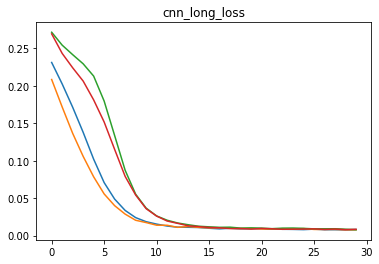

In [23]:
plt.title('cnn_long_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['loss'])

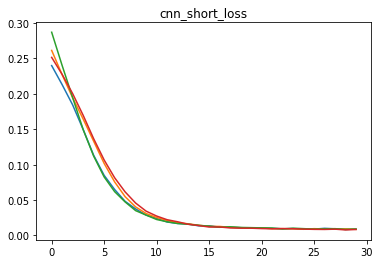

In [24]:
plt.title('cnn_short_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['loss'])

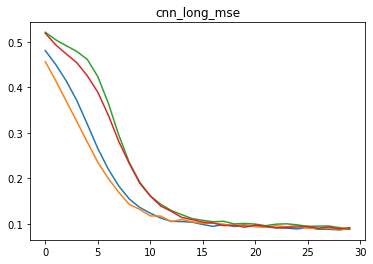

In [25]:
plt.title("cnn_long_mse")
for i in range(4):
    plt.plot(cnn_long_result[i]['root_mean_squared_error'])

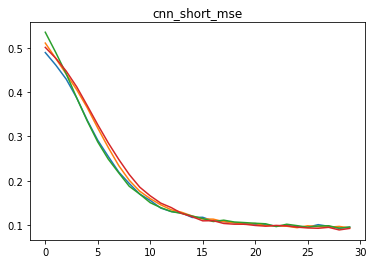

In [26]:
plt.title("cnn_short_mse")
for i in range(4):
    plt.plot(cnn_short_result[i]['root_mean_squared_error'])

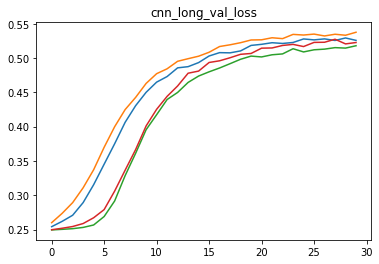

In [27]:
plt.title('cnn_long_val_loss')
for i in range(4):
    plt.plot(cnn_long_result[i]['val_loss'])

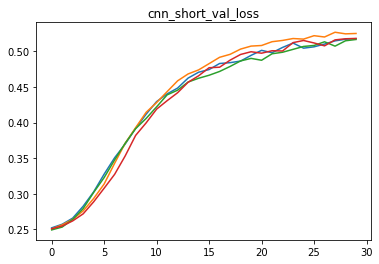

In [28]:
plt.title('cnn_short_val_loss')
for i in range(4):
    plt.plot(cnn_short_result[i]['val_loss'])

26/26 [==============================] - 0s 5ms/step


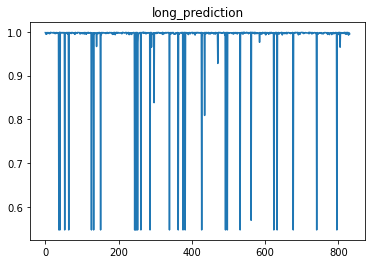

In [32]:
cnn_predict_long = model_long.predict(test_dataset, verbose = True)
plt.title("long_prediction")
plt.plot(cnn_predict_long)

26/26 [==============================] - 0s 2ms/step


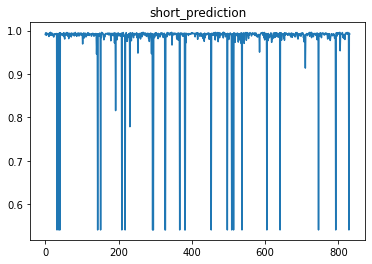

In [33]:
cnn_predict_short = model_short.predict(test_dataset, verbose = True)
plt.title("short_prediction")
plt.plot(cnn_predict_short)

array([[<AxesSubplot:title={'center':'cnn_predict_short_result'}>]],
      dtype=object)

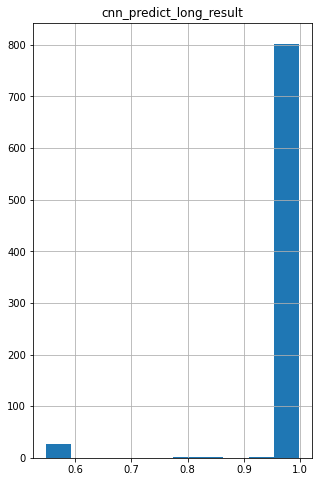

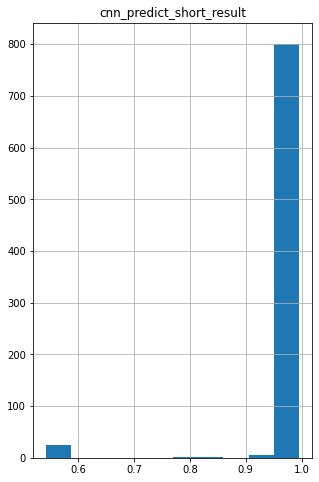

In [34]:
cnn_predict_long_result = pd.DataFrame(cnn_predict_long)
cnn_predict_long_result.columns = ['cnn_predict_long_result']
cnn_predict_long_result.hist(figsize = (5,8),column= 'cnn_predict_long_result')

cnn_predict_short_result = pd.DataFrame(cnn_predict_short)
cnn_predict_short_result.columns = ['cnn_predict_short_result']
cnn_predict_short_result.hist(figsize = (5,8),column= 'cnn_predict_short_result')